<a href="https://colab.research.google.com/github/Neiouo/Eric/blob/main/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80_%E4%BD%9C%E6%A5%AD%E4%BA%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1oKqz5BLy6kp45xBB62V5BzjkoounjjJC7fkElDKg3Qs/edit?usp=sharing').sheet1

In [4]:
dicts = gc.open_by_url('https://docs.google.com/spreadsheets/d/1oKqz5BLy6kp45xBB62V5BzjkoounjjJC7fkElDKg3Qs/edit?usp=sharing').get_worksheet(0)
dicts = dicts.get_all_records()
dicts = pd.DataFrame(dicts)

In [5]:
# 讀取所有數據
rows = gsheets.get_all_records()
import pandas as pd
df = pd.DataFrame(rows)

In [6]:
df.head()

,用戶名稱,內容,IP位址,時間
0,AbeNana,錯板 請至NB蝦,114.136.198.78,12/04 22:34
1,spfy,客服一定叫你買官方的阿 我後來是買Innergie,27.53.168.161,12/04 22:35
2,spfy,的筆電充電器 全品牌接頭都有附,27.53.168.161,12/04 22:36
3,mrme945,錯板 但我也推Innergie,223.139.14.8,12/04 22:37
4,dos01,我覺得客服在唬爛你,182.155.78.98,12/04 22:38


In [ ]:
!pip install jieba
!pip install snownlp

In [8]:
import jieba
from snownlp import SnowNLP
import pandas as pd
from collections import Counter
import re
import plotly.express as px

In [10]:
# 只保留中文字
def extract_chinese(text):
    return ''.join(re.findall(r'[\u4e00-\u9fa5]', text))

In [12]:
df['Chinese_Content'] = df['內容'].apply(extract_chinese)

# 使用 Jieba 斷詞
df['Tokenized'] = df['Chinese_Content'].apply(lambda x: list(jieba.cut(x, HMM=True)))

# 展平成所有詞語的列表
all_words = [word for tokens in df['Tokenized'] for word in tokens if len(word) > 1]

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.312 seconds.
DEBUG:jieba:Loading model cost 2.312 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [13]:
df['Tokenized']

,Tokenized
0,"[錯板, 請, 至, 蝦]"
1,"[客服, 一定, 叫, 你, 買, 官方, 的, 阿, 我後來, 是, 買]"
2,"[的, 筆電充, 電器, 全, 品牌, 接頭, 都, 有, 附]"
3,"[錯板, 但, 我, 也, 推]"
4,"[我覺, 得, 客服, 在, 唬爛, 你]"
5,"[這種, 規格, 的, 東西, 哪, 是, 什麼, 機密]"
6,"[這種, 我, 都, 是, 去, 對岸, 買, 規格, 對, 了, 看, 評價]"
7,"[客服, 我, 就爛]"
8,"[不雷, 就, 上, 畢竟, 便宜, 太多, 了]"
9,"[都, 不, 希望, 用戶, 使用, 非官方, 的, 變壓器, 很, 可能]"


In [14]:
df.head()

,用戶名稱,內容,IP位址,時間,Chinese_Content,Tokenized
0,AbeNana,錯板 請至NB蝦,114.136.198.78,12/04 22:34,錯板請至蝦,"[錯板, 請, 至, 蝦]"
1,spfy,客服一定叫你買官方的阿 我後來是買Innergie,27.53.168.161,12/04 22:35,客服一定叫你買官方的阿我後來是買,"[客服, 一定, 叫, 你, 買, 官方, 的, 阿, 我後來, 是, 買]"
2,spfy,的筆電充電器 全品牌接頭都有附,27.53.168.161,12/04 22:36,的筆電充電器全品牌接頭都有附,"[的, 筆電充, 電器, 全, 品牌, 接頭, 都, 有, 附]"
3,mrme945,錯板 但我也推Innergie,223.139.14.8,12/04 22:37,錯板但我也推,"[錯板, 但, 我, 也, 推]"
4,dos01,我覺得客服在唬爛你,182.155.78.98,12/04 22:38,我覺得客服在唬爛你,"[我覺, 得, 客服, 在, 唬爛, 你]"


In [16]:
user_message_count = df['用戶名稱'].value_counts()
user_message_count

,count
用戶名稱,
justice2008,4
miketk,3
spfy,2
dos01,2
mrme945,1
AbeNana,1
Depthsharky,1
tactics2100,1


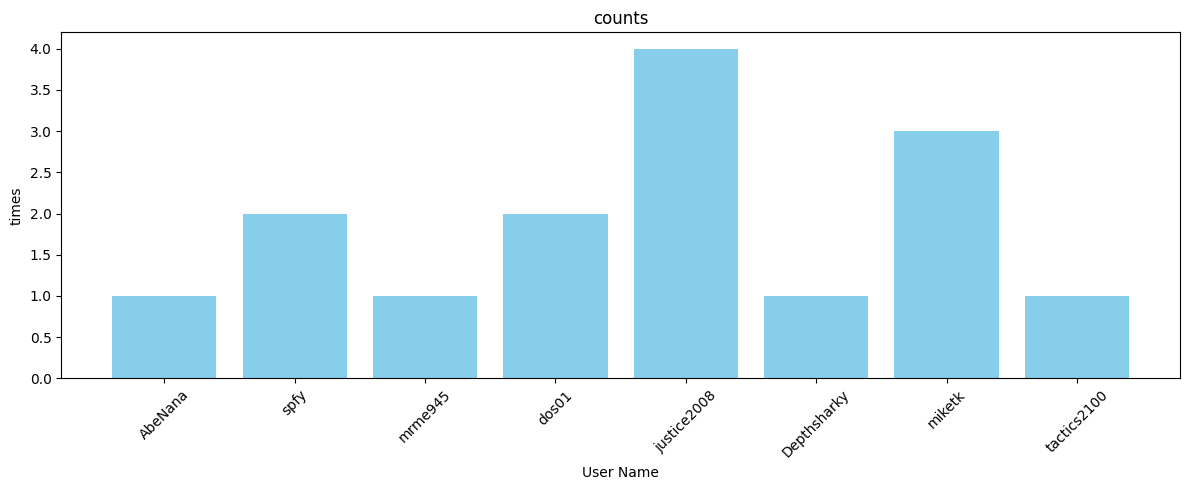

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

# 統計留言次數
counter = Counter(df['用戶名稱'])

# 資料分開成 X（名稱）與 Y（次數）
names = list(counter.keys())
counts = list(counter.values())

# 繪製長條圖
plt.figure(figsize=(12, 5))
plt.bar(names, counts, color='skyblue')
plt.xlabel('User Name')
plt.ylabel('times')
plt.title('counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
user_message_count.describe()

,count
count,8.000000
mean,1.875000
std,1.125992
min,1.000000
25%,1.000000
50%,1.500000
75%,2.250000
max,4.000000


In [30]:
accounts_to_extract = set(df['用戶名稱'].unique())
accounts_to_extract

{'AbeNana',
 'Depthsharky',
 'dos01',
 'justice2008',
 'miketk',
 'mrme945',
 'spfy',
 'tactics2100'}

In [31]:
filtered_df = df[df['用戶名稱'].isin(accounts_to_extract)]

In [32]:
filtered_df

,用戶名稱,內容,IP位址,時間,Chinese_Content,Tokenized
0,AbeNana,錯板 請至NB蝦,114.136.198.78,12/04 22:34,錯板請至蝦,"[錯板, 請, 至, 蝦]"
1,spfy,客服一定叫你買官方的阿 我後來是買Innergie,27.53.168.161,12/04 22:35,客服一定叫你買官方的阿我後來是買,"[客服, 一定, 叫, 你, 買, 官方, 的, 阿, 我後來, 是, 買]"
2,spfy,的筆電充電器 全品牌接頭都有附,27.53.168.161,12/04 22:36,的筆電充電器全品牌接頭都有附,"[的, 筆電充, 電器, 全, 品牌, 接頭, 都, 有, 附]"
3,mrme945,錯板 但我也推Innergie,223.139.14.8,12/04 22:37,錯板但我也推,"[錯板, 但, 我, 也, 推]"
4,dos01,我覺得客服在唬爛你,182.155.78.98,12/04 22:38,我覺得客服在唬爛你,"[我覺, 得, 客服, 在, 唬爛, 你]"
5,dos01,這種規格的東西哪是什麼機密,182.155.78.98,12/04 22:39,這種規格的東西哪是什麼機密,"[這種, 規格, 的, 東西, 哪, 是, 什麼, 機密]"
6,justice2008,這種我都是去對岸買 規格對了 看評價,114.32.14.43,12/04 22:39,這種我都是去對岸買規格對了看評價,"[這種, 我, 都, 是, 去, 對岸, 買, 規格, 對, 了, 看, 評價]"
7,Depthsharky,客服:我就爛,36.228.212.221,12/04 22:40,客服我就爛,"[客服, 我, 就爛]"
8,justice2008,不雷就上 畢竟便宜太多了==,114.32.14.43,12/04 22:40,不雷就上畢竟便宜太多了,"[不雷, 就, 上, 畢竟, 便宜, 太多, 了]"
9,miketk,NB都不希望用戶使用非官方的變壓器很可能,1.163.191.67,12/04 22:40,都不希望用戶使用非官方的變壓器很可能,"[都, 不, 希望, 用戶, 使用, 非官方, 的, 變壓器, 很, 可能]"


In [33]:
from google.colab import userdata
apikey = userdata.get('Gemini')

In [34]:
import google.generativeai as genai
genai.configure(api_key = apikey)
model = genai.GenerativeModel("gemini-1.5-flash")

prompt = f"用中文分析社交媒體上對特定事件的風向：{filtered_df.to_string()}"

response = model.generate_content(prompt)
print(response.text)

這段社交媒體數據反映了使用者對於筆電非官方充電器的討論，主要風向可以歸納為以下幾點：

**1.  對官方客服的不信任：** 多位用戶 (例如用戶dos01,  spfy, Depthsharky) 表達了對官方客服的不信任，認為客服在誤導用戶購買官方充電器，甚至使用“唬爛”等詞語，顯示負面情緒。

**2.  非官方充電器的接受度高：**  多數用戶 (例如spfy, justice2008) 推薦或表示使用非官方充電器，例如Innergie，並指出其價格更便宜，且功能齊全（全品牌接頭）。  用戶justice2008甚至提到從對岸購買非官方充電器。這說明非官方充電器在使用者間有較高的接受度。

**3.  對官方充電器價格的抱怨：**  用戶justice2008明確指出原廠充電器“貴噴”，反映了使用者對於官方充電器高昂價格的不滿。

**4.  對筆記型電腦廠商策略的質疑：** 用戶miketk提到筆記型電腦廠商不希望用戶使用非官方變壓器，可能導致設備損壞，並指出部分機種會辨識充電器並限制功率。用戶justice2008則質疑技嘉筆電的充電器是否為自產。這反映出使用者對於廠商策略的質疑和不滿。

**5.  「錯板」提示：**  部分用戶（AbeNana, mrme945）指出該討論發文在錯誤的版面，暗示可能存在更合適的討論場所。


**總結:**  整體風向傾向於支持使用價格更低的非官方充電器，並對官方客服的說法和官方充電器的價格抱持負面態度。  使用者之間存在一定的共識，即官方充電器價格過高，且非官方充電器性能可靠。  然而，也存在一些用戶提醒注意使用非官方充電器的潛在風險，以及發文版面不合適的提示。  需要注意的是，樣本數量有限，僅能反映部分用戶的意見，不代表整體用戶的觀點。

